In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

In [3]:
keywords = ['click', 'offer', 'winner', 'win', 'buy', 'free', 'cash', 'urgent', "don't miss", 'today!', 'here!', 
            'available', 'online!', 'deal', 'now', 'amazing', 'bonus', 'credit', 'discount', 'for just',
            'for only', 'rate', 'sale', 'gift']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [4]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [5]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

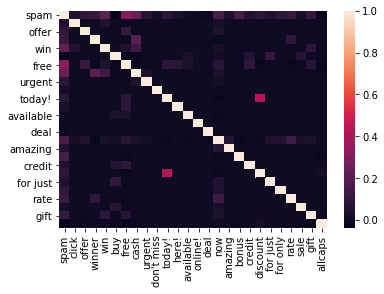

In [6]:
sns.heatmap(sms_raw.corr())

In [7]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [8]:
## Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 522


In [9]:
# Build your confusion matrix and calculate sensitivity and specificity here.
def manually_calculate_tp_tn_fp_fn(target, y_pred):
    """Manually create confusion matrix by comparing predictions with answers."""
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    x = 0
    while x < len(target):
        if target[x] == 0 and y_pred[x] == 0:
            TN += 1
        if target[x] == 0 and y_pred[x] == 1:
            FP += 1
        if target[x] == 1 and y_pred[x] == 1:
            TP += 1
        if target[x] == 1 and y_pred[x] == 0:
            FN += 1
        x += 1

    cm = [[TN, FP],[FN, TP]]
    return cm

In [10]:
manually_calculate_tp_tn_fp_fn(target, y_pred)

[[4758, 67], [455, 292]]

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[4758,   67],
       [ 455,  292]])

In [16]:
sensitivity = (455/(455+292))
print("Sensitivity = {}".format(sensitivity))

Sensitivity = 0.6091030789825971


In [17]:
specificity = (4758/(4758+67))
print("Specificity = {}".format(specificity))

Specificity = 0.9861139896373057
